# Information about this Project
- This project is about using machine learning model to predict the selling of bulldozer, the dataset is from kaggle competition https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/description 
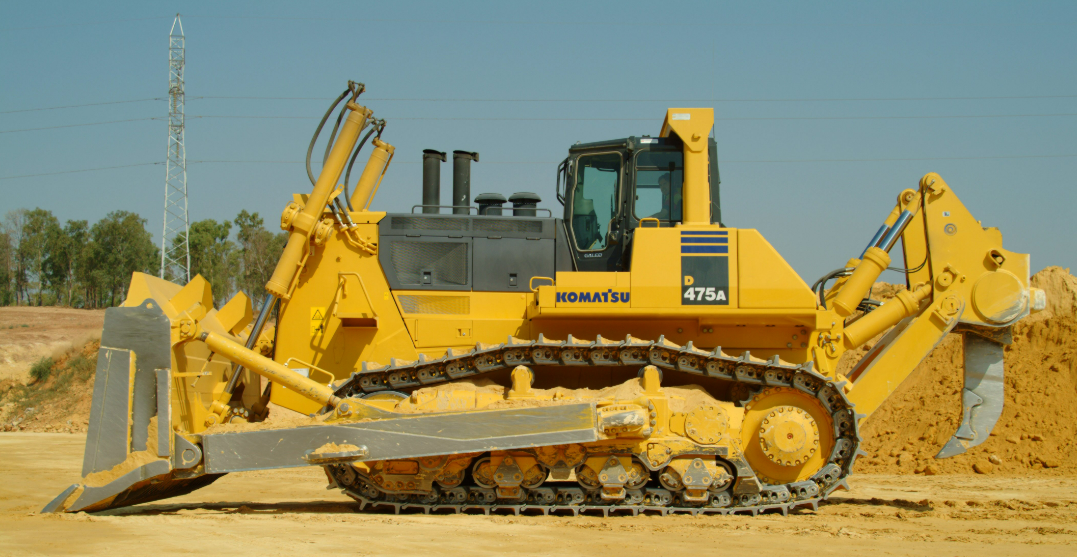

- Problem definition: So when you build a prediction model, if the label is not a category(0 or 1) but it a true value like house price it increase or decrease that mean your problem is "Regression Problem"

- Data: The dataset is structured data and it split into 3 part:
      
      + Train.csv is the training set, which contains data through the end of 2011.
      
      + Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
      
      + Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
      
   The key fields in train.csv are:

       SalesID: the uniue identifier of the sale

       MachineID: the unique identifier of a machine.  A machine can be sold multiple times

       saleprice: what the machine sold for at auction (only provided in train.csv)

       saledate: the date of the sale

- Evaluation : The evaluation metric for this project is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

*All additional information about the features is included in the attached file within the compressed data set.

# Let check what do we have in the dataset

In [42]:
import pandas as pd
import seaborn as sns

In [48]:
#Import train and validation set, we will split them into 2 sets later
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)

In [49]:
#Checking our data
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# I Saw the saledate column kind of weird let check it out
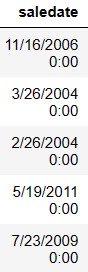

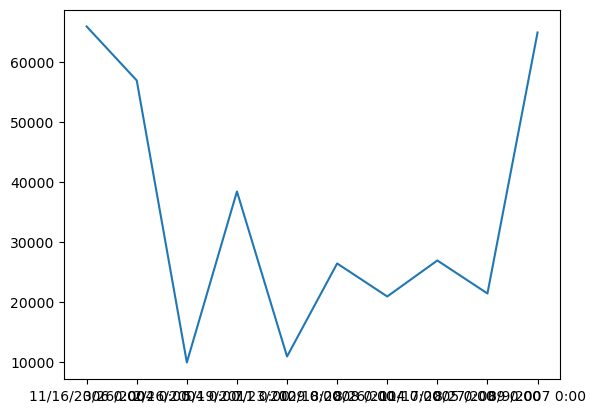

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['saledate'][:10],df['SalePrice'][:10]);

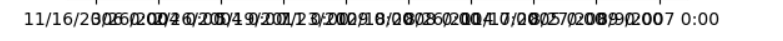
# this look kinda weird 🤔 let check it datatype

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o


See! it in wrong data type, let change this to datetime datatype

In [76]:
#Just pass the saledate to the "parse_dates" parameter when we reimport the dataset
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

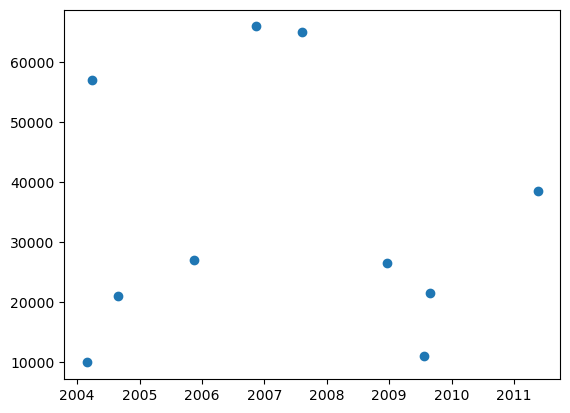

In [58]:
#Let check it again
plt.scatter(df['saledate'][:10],df['SalePrice'][:10]);

It looking good now let create another coloumn from the saledate to enrich our data and after that.... we drop the saledate

In [77]:
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month
df["saleDay"] = df.saledate.dt.day
df["saleDayOfWeek"] = df.saledate.dt.day_of_week
df["saleDayOfYear"] = df.saledate.dt.day_of_year

It important to sort the datetime data. When you working with datetime,like you wanna analysis or doing prediction on something relate to datetime in our case we use old(from the previous year) sell price to predict the new sell price.

In [78]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)

In [79]:
df.drop('saledate',axis = 1,inplace = True)

Now we done with saledate coloumn let take a look of all of our data

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalesID,412698.0,2.011161e+06,1.080068e+06,1139246.0,1421897.75,1645852.5,2261012.50,6333349.0
SalePrice,412698.0,3.121518e+04,2.314174e+04,4750.0,14500.00,24000.0,40000.00,142000.0
MachineID,412698.0,1.230061e+06,4.539533e+05,0.0,1088593.25,1284397.0,1478079.25,2486330.0
ModelID,412698.0,6.947202e+03,6.280825e+03,28.0,3261.00,4605.0,8899.00,37198.0
datasource,412698.0,1.351694e+02,9.646749e+00,121.0,132.00,132.0,136.00,173.0
auctioneerID,392562.0,6.585268e+00,1.715841e+01,0.0,1.00,2.0,4.00,99.0
YearMade,412698.0,1.899050e+03,2.921902e+02,1000.0,1985.00,1995.0,2001.00,2014.0
MachineHoursCurrentMeter,147504.0,3.522988e+03,2.716993e+04,0.0,0.00,0.0,3209.00,2483300.0
saleYear,412698.0,2.004317e+03,5.821090e+00,1989.0,2000.00,2006.0,2009.00,2012.0
saleMonth,412698.0,6.300268e+00,3.437276e+00,1.0,3.00,6.0,9.00,12.0


In [82]:
df.shape

(412698, 57)

In [83]:
#Let check if the dataset have any missing value
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

# Let summary a litte bit after we do some quick look at our data

-  We have a lot of missing data spanning both types of data

-  And last thing all of our data is not in numerical format yet, in order to the model to understand all of our data we must convert all non numeric data into numeric 

So let build a function that can do this kind of work

In [3]:
def preprocess_data(new_df):        
    for label, content in new_df.items():
        if pd.api.types.is_string_dtype(content):
             new_df[label] = content.astype("category").cat.as_ordered() #Turn our object data into category
    for label,content in new_df.items():
        if not pd.api.types.is_numeric_dtype(content):
             new_df[label] = pd.Categorical(content).codes + 1 #Convert all non numeric to numeric data
    for label,content in new_df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                new_df[label] = content.fillna(content.median()) #fill missing numeric value 
    return new_df

In [85]:
df_new = preprocess_data(df)

In [87]:
df_new.isnull().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

In [90]:
#Check if any data still not numeric,not print out anything is good
for label,content in new_df.items():
        if not pd.api.types.is_numeric_dtype(content):
             print(label)

# Now all of data is preprocessed let head to modelling part

In [94]:
df_new.to_csv("bluebook-for-bulldozers/preprocess_data1.csv",index = False)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
#Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,r2_score
import numpy as np

In [12]:
new_data = pd.read_csv("bluebook-for-bulldozers/preprocess_data1.csv")

In [14]:
#let split the data 
df_val = new_data[new_data.saleYear == 2012]
df_train = new_data[new_data.saleYear != 2012]

len(df_train),len(df_val)

(401125, 11573)

In [15]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

len(X_train),len(y_train),len(X_valid),len(y_valid)

(401125, 401125, 11573, 11573)

In [44]:
#let fit the train data to RandomforestRegressor to avoid the fitting process to long i set the max_samples to 15k
RFR = RandomForestRegressor(n_jobs=-1,max_samples=15000,random_state=42)
RFR.fit(X_train,y_train)

RandomForestRegressor(max_samples=15000, n_jobs=-1, random_state=42)

* Because the evaluation metrics of the competition is root mean squared log error so let build a function to calculate it and other function to show all the result of the model on train set and valid set

In [32]:
def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

In [33]:
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [42]:
show_scores(RFR)

{'Training MAE': 5563.72867258336,
 'Valid MAE': 7168.9377352458305,
 'Training RMSLE': 0.2578202020674087,
 'Valid RMSLE': 0.2929702627803096,
 'Training R^2': 0.8605936890077203,
 'Valid R^2': 0.8322757239076886}

# Let try improve the model to see if it can make it better

In [48]:
#Let try change the max_sample to 40000

In [27]:
RFR = RandomForestRegressor(n_jobs=-1,max_samples=40000,random_state=42)

In [50]:
RFR.fit(X_train,y_train)

RandomForestRegressor(max_samples=40000, n_jobs=-1, random_state=42)

In [52]:
show_scores(RFR)

{'Training MAE': 4492.848901788719,
 'Valid MAE': 6458.38263544457,
 'Training RMSLE': 0.214048972848381,
 'Valid RMSLE': 0.2666847543913338,
 'Training R^2': 0.9062032556616143,
 'Valid R^2': 0.8621335479880188}

In [69]:
#Let try using RandomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV

In [65]:
RFR_grid = {'n_estimators':np.arange(10,150,10),
            'min_samples_leaf':np.arange(1,30,2),
            'min_samples_split':np.arange(2,20,2),
            'max_features':[0.5, 1, 'sqrt','log2'],
            'max_samples':[30000]
            }

In [66]:
#rs_rf = RandomizedSearchCV(RandomForestRegressor(),
#                          param_distributions=RFR_grid,
#                          cv = 5,
#                          n_iter = 10,
#                        verbose=True)
#rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [30000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140])},
                   verbose=True)

In [67]:
show_scores(rs_rf)

{'Training MAE': 5206.5222740228755,
 'Valid MAE': 6672.750919548529,
 'Training RMSLE': 0.2415171476728859,
 'Valid RMSLE': 0.2737854871903842,
 'Training R^2': 0.8761243188061185,
 'Valid R^2': 0.8531646463004254}

In [68]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_samples': 30000,
 'max_features': 0.5}

# Let predict on the test data

In [4]:
test_data = pd.read_csv("bluebook-for-bulldozers/Test.csv",low_memory=False)

Look like the test data have the same datatype problem with the saledate columns

In [5]:
test_data =pd.read_csv("bluebook-for-bulldozers/Test.csv",low_memory=False,parse_dates=["saledate"])

Because our model is train from train data that has been preprocessed so we have to do same step with the test data for the model can be able to predict

In [6]:
test_data["saleYear"] = test_data.saledate.dt.year
test_data["saleMonth"] = test_data.saledate.dt.month
test_data["saleDay"] = test_data.saledate.dt.day
test_data["saleDayOfWeek"] = test_data.saledate.dt.day_of_week
test_data["saleDayOfYear"] = test_data.saledate.dt.day_of_year

In [7]:
test_data.drop('saledate', axis = 1,inplace =True)

In [9]:
new_test = preprocess_data(test_data)

In [11]:
new_test.shape

(12457, 56)

In [35]:
#Create new model with best parameters
rfr = RandomForestRegressor(n_estimators=110,
                            min_samples_split=14,
                            min_samples_leaf=3,
                            max_samples=40000,
                            max_features=0.5,
                            random_state=42)

In [36]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, max_samples=40000, min_samples_leaf=3,
                      min_samples_split=14, n_estimators=110, random_state=42)

In [37]:
show_scores(rfr)

{'Training MAE': 4977.683960323414,
 'Valid MAE': 6486.303375457588,
 'Training RMSLE': 0.23210628331293326,
 'Valid RMSLE': 0.2657676945973018,
 'Training R^2': 0.8861252196976016,
 'Valid R^2': 0.8598100514428344}

In [53]:
#Let save out model for many further work
import pickle
pickle.dump(rfr,open("bulldozer.pkl","wb"))

In [38]:
test_preds = rfr.predict(new_test)

In [39]:
test_preds

array([18848.40852662, 16248.13478062, 52525.89240305, ...,
       14812.8632958 , 18114.5482737 , 24459.61782536])

In [41]:
# Format predictions into the same format from Kaggle 
df_preds = pd.DataFrame()
df_preds["SalesID"] = new_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,18848.408527
1,1227844,16248.134781
2,1227847,52525.892403
3,1227848,63741.708607
4,1227863,45237.521325
...,...,...
12452,6643171,35215.588275
12453,6643173,14387.505679
12454,6643184,14812.863296
12455,6643186,18114.548274


# The final step is to identify which features has the most significant impact on predicting the selling price

In [51]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

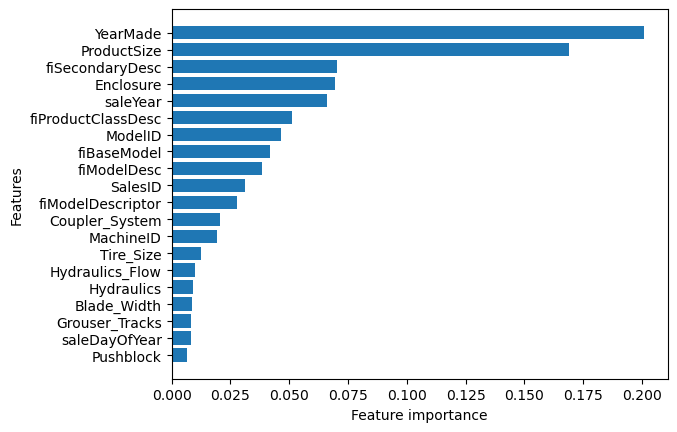

In [52]:
plot_features(X_train.columns,rfr.feature_importances_)

- It seems that the "yearMade" column has a significant influence on the selling price of the cars. Naturally, newer production versions will have higher selling prices.

- The "enclosure" column also appears to be among the top influencers. Cars with enclosed cabins tend to have higher prices because they provide better protection for the driver in a work environment. This is a natural expectation.

- The 'saleYear' column also has an impact, as the economy changes every year. We can see how the economy affects car sales each year. For example, in 2008, during the economic crisis, there were fewer bulldozer sold."

# That the end of this notebook If you're still reading this, I wish you a great day!